In [20]:
import numpy as np
import scipy as sy
from scipy.misc import derivative
import quantecon as qe
import sympy as sp
from matplotlib import pyplot as plt
from autograd import grad
import autograd.numpy as anp
import numpy.linalg as la

Problem 1
=========

In [60]:
def g(x):
    return np.exp(x) - 2

def dg(x):
    return np.exp(x)

def r(x):
    return x ** 4 - 3

def dr(x):
    return 4 * x **3

def newton(g, dg, x0, maxiters, epsilon = 1e-5):
    
    x1 = 0
    diff = 15 
    success = "False"
    
    for k in range(maxiters):
 
        x1 = x0 - (g(x0)/dg(x0))
        diff = abs(x1 - x0)
        if ( diff < epsilon ):
            success = "True"
            break
        x0 = x1

    return x1, k, success

x0 = 1
maxiters = 3000
x1, k, success = newton(g, dg, x0, maxiters)
x11, k1, success1 = newton(r, dr, x0, maxiters)

print('Root =', x1,', Iterations =', k, 'Success =', success)
print('Root =', x11,', Iterations =', k1, 'Success =', success1)

print(r(1.3160740129525732))

Root = 0.69314718056 , Iterations = 3 Success = True
Root = 1.3160740129543826 , Iterations = 4 Success = True
7.362999099314038e-13


Problem 2
=========

In [3]:
def h(p1, p2, n1, n2, r):
    return (p1 * ((1+r) ** n1)) - p1 - p2 + (p2 * ((1+r) ** (- (n2))))

def dh(p1, p2, n1, n2, r):
    return n1 * p1 * (1+r) **(n1 - 1) + p2 * (-n2) * (1+r) ** (-n2 - 1)

def ir(g, dg, n1, n2, p1, p2, r0):
    
    x1 = 0
    diff = 15 
    success = "False"
    
    for k in range(1000):
 
        r1 = r0 - (g(p1, p2, n1, n2, r0)/dg(p1, p2, n1, n2, r0))
        if ( abs(r1  - r0) < 1e-5):
            success = "True"
            break
        r0 = r1

    return r1, k, success

n1 = 30
n2 = 20
p1 = 2000
p2 = 8000
r0 = 0.1
r1, k, success = ir(h, dh, n1, n2, p1, p2, r0)

print(r1, k, success)

0.03877843223027751 5 True


Problem 3
=============

In [15]:
func = lambda x: float(np.sign(x) * np.power(np.abs(x), 1./3))
#dfunc = lambda x: float( (1./3) * np.sign(x) * np.power(np.abs(x), - 2./3))
#dfunc2 = grad(func)
dfunc = lambda x: (1 / 3) * (x**2) ** (-1/3)

def newton_bs(func, dfunc, x0, maxiters, alpha, epsilon = 0.01):
    
    x1 = 1
    diff = 15 
    success = "False"
    
    for k in range(maxiters):
        
        if dfunc(x0) == 0:
            x1 = 0
            success = "Cannot run Newton's Method"
            break
        
        else: 
            x1 = x0 - (alpha * (func(x0)/ dfunc(x0))) # sy.misc.derivative(func, x0)))#dfunc(x0)))
            diff = abs(x1 - x0)
            if ( diff < epsilon ):
                success = "True"
                break
            x0 = x1

    return x1, k, success

x0 = 0.01
maxiters = 10000
alpha = 0.4
x1, k, success = newton_bs(func, dfunc, x0, maxiters, alpha)

print('Root =', x1,', Iterations =', k, 'Success =', success)

# Consider Autograd?

Root = 0.0004000000000000019 , Iterations = 1 Success = True


Problem 4
===============

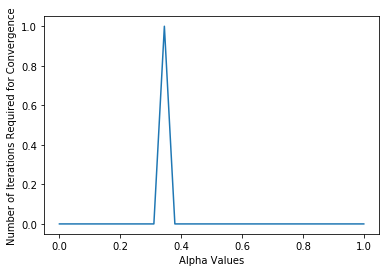

In [17]:
def newton_bs_alpha(func, dfunc, x0, alphavec, maxiters, epsilon = 0.01):
    
    x1 = 0
    diff = 15 
    success = "False"
    kvec = np.empty(len(alphavec))
    
    for i in range(len(alphavec)):
        
        for k in range(maxiters):
        
            #if dfunc(x0) == 0:
                #x1 = 0
                #success = "True"
                #break
                
        
            #else: 
            x1 = x0 - (alphavec[i] * (func(x0)/ dfunc(x0)))
            diff = abs(x1 - x0)
                
            if ( diff < epsilon ):
                success = "True"
                break
            x0 = x1
                
        kvec[i] = k 

    return kvec

x0 = 0.01
alphavec = np.linspace(0, 1, 30)
kvec = np.empty(len(alphavec))
maxiters = 100000

kvec = newton_bs_alpha(func, dfunc, x0, alphavec, maxiters)
plt.plot (alphavec, kvec)
plt.xlabel('Alpha Values')
plt.ylabel('Number of Iterations Required for Convergence')
plt.show()

Problem 5
==============

In [36]:
from autograd import jacobian

f5 = lambda x: anp.array([3 * x[0] **2, 5 * x[0] ** 3 + 3 *x[1] ])

def get_jacob(func, x0):
    jacobian_f = jacobian(func)
    jac = jacobian_f(anp.array(x0))
    return jac


def newton_mv(func, x0, maxiters, alpha, dfunc = None,  epsilon = 0.01):
    
    if np.isscalar(x0) ==True:
    
        x1 = 1
        diff = 15 
        success = "False"
    
        for k in range(int(maxiters)):
        
            if dfunc(x0) == 0:
                x1 = 0
                success = "Cannot run Newton's Method"
                break
        
            else: 
                x1 = x0 - (alpha * (func(x0)/ dfunc(x0)))
                diff = abs(x1 - x0)
                if ( diff < epsilon ):
                    success = "True"
                    break
                x0 = x1
            
    else:
        
        x1 = np.ones(len(x0))
        y = np.zeros(len(x0))
        diff = 15 
        success = "False"  
    
        for k in range(int(maxiters)):
        
            if np.all(dfunc(x0)) == 0:
                x1 = 0
                success = "Cannot run Newton's Method"
                break
        
            else: 
                jac = get_jacob(func, x0)
                y = la.solve(jac, func(x0))
                x1 = x0 - alpha * y
                diff = la.norm(x1 - x0)
                if ( diff < epsilon ):
                    success = "True"
                    break
                x0 = x1
        
    return x1, k, success

x0 = np.array((1.0,1.0))
maxiters = int(1000)
alpha = 0.4
x1, k, success = newton_mv(f5, x0, maxiters, alpha, dfunc)

print('Root =', x1,', Iterations =', k, ',Success =', success)

Root = [ 0.03518437  0.0020862 ] , Iterations = 14 ,Success = True


Problem 6
============

In [116]:
f6 = lambda x: anp.array([(5 * x[0] * x[1]) - (x[0] * (1 + x[1])) , \
                         (- (x[0] * x[1])) + ((1 - x[1]) * (1 + x[1]))])

def get_jacob(func, x0):
    jacobian_f = jacobian(func)
    jac = jacobian_f(anp.array(x0))
    return jac

def p6(func, xtrue, maxiters, alpha, epsilon = 0.001):
    
    tol = 1e-10
    
    x1 = np.array((0,0))
    grid1 = np.linspace(-0.25, 0, 1000)
    grid2 = np.linspace(0, 0.25, 1000)
    success = "False"
    
    for i in range (0, len(grid1)):
        
        for j in range (0, len(grid2)):
            
            if success == "False":
            
                x0 = np.array((grid1[i], grid2[j]))
        
                for k in range(int(maxiters)):
        
                    jac = get_jacob(func, x0)
                    y = la.solve(jac, func(x0))
                    x1 = x0 - alpha * y
                    diff = la.norm(x1 - x0)
                    if ( diff < epsilon ):
                        print("Final root:", x0)
                        break
                        
                    x0 = x1
            
                error = abs(x1 - xtrue)
            
                if np.all(error < tol):
                    success = "True"
                    initial_pt = np.array((grid1[i], grid2[j]))
    
    return x1, initial_pt

xtrue = np.array((0, -1))
maxiters = int(1000)
alpha = 1
x1, initial1 = p6(f6, xtrue, maxiters, alpha)
print(('Converged to: ', x1, "Initial point used:", initial1))

#xtrue = np.array((0.00111, -1))
#maxiters = int(1000)
#alpha = 0.55
#x2, initia2 = p6(f6, xtrue, maxiters, alpha)
#print(('Converged to: ', x2, "Initial point used:", initial2))

Final root: [  9.89117927e-04  -9.99957241e-01]
Final root: [  9.98160413e-04  -9.99956831e-01]
Final root: [ -3.51244138e-08  -1.00000001e+00]
('Converged to: ', array([ -1.50064910e-16,  -1.00000000e+00]), 'Initial point used:', array([-0.25     ,  0.0005005]))


Problem 7
===============

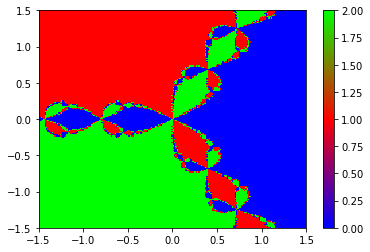

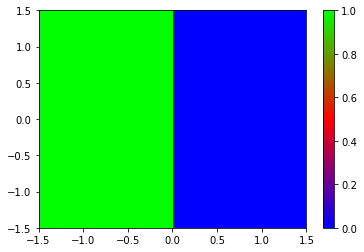

In [184]:
f = lambda x: x**3 - 1
Df = lambda x: 3*x**2

f1 = lambda x: x**3 - x
Df1 = lambda x: 3*(x**2) - 1

def f8(f, df, roots, bounds, res, iters):
    
    rmin, rmax, imin, imax = bounds
    
    x_real = np.linspace(rmin, rmax, res) # Real parts.
    x_imag = np.linspace(imin, imax, res) # Imaginary parts.
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag # Combine real and imaginary parts.  
    
    for k in range(iters):
        X_1 = X_0 - f(X_0)/Df(X_0)
        X_0 = X_1
    
    Y = np.empty((res, res))
    
    #index = np.arange(0, len(roots))
    diff = np.arange(0, len(roots))
    #print(roots)
    for i in range (0, res):
        for j in range (0, res):
    #Y = np.vectorize(lambda x:np.argmin(np.abs(roots-x)))(X_1)        
            diff = np.abs (X_0[i][j]  - roots)
            Y[i][j] = np.argmin(np.abs(X_0[i][j]  - roots))
    #print(X_0)
    #print(Y)
    plt.pcolormesh(x_real, x_imag, Y, cmap="brg")
    plt.colorbar()
    plt.show()
    
    return

bounds = np.array ([-1.5, 1.5, -1.5, 1.5])
res = 200
iters = 20
roots = np.array((1, -0.5+((np.sqrt(3) * 1j) /2), -0.5-((np.sqrt(3) * 1j) /2) ))
f8(f, Df, roots, bounds, res, iters)
roots1 = np.array ([1, -1, 1])
f8(f1, Df1, roots1, bounds, res, iters)